# Interview Before Feedback

In [44]:
#Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from subprocess import check_output
import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')


In [45]:
#Importing the Dataset 

dataset = pd.read_csv('b.csv')
dataset.head()

,Participant,Overall,RecommendHiring,Colleague,Engaged,Excited,EyeContact,Smiled,SpeakingRate,NoFillers,Friendly,Paused,EngagingTone,StructuredAnswers,Calm,NotStressed,Focused,Authentic,NotAwkward,Total
0,p1,5.297316,5.106224,5.333004,5.541380,5.043890,5.866119,3.576160,4.865590,3.771665,5.254784,5.800468,5.147909,4.891580,5.351075,5.350760,5.845226,5.610513,5.477534,93.131196
1,p3,4.414892,4.433070,5.010430,5.616076,5.601586,5.426861,6.062173,5.016286,3.332458,6.500329,4.791550,5.621231,3.912199,4.476537,5.521215,5.549829,6.014960,4.923550,92.225232
2,p4,4.494494,4.530129,4.500707,5.494494,4.261343,3.857848,4.852150,4.738000,3.111445,5.369884,5.177447,4.392736,4.688379,5.065190,5.566084,5.324136,5.658364,4.452909,85.535740
3,p5,5.457670,5.571558,5.772488,5.903057,4.707062,6.694276,3.920479,4.927181,5.881741,5.649119,5.886326,4.695523,5.582514,6.130488,5.916373,6.322086,6.020070,5.629838,100.667850
4,p6,5.106512,4.831482,4.860595,5.020385,4.648259,4.331805,4.194227,4.174891,3.920329,4.495375,5.027823,4.261988,4.826245,5.828977,5.824390,5.619420,5.371858,5.295977,87.640538


In [46]:
#finding the students who got 6 or above ratings are hired

Hired_students_before_fd = dataset.loc[dataset['Overall'] >= 6]
#Hired_students_before_fd = Hired_students.loc[:,[ '''RecommendHiring','Colleague','Engaged','Excited','EyeContact','Smiled','SpeakingRate','NoFillers','Friendly','Paused','EngagingTone','StructuredAnswers','Calm','NotStressed','Focused','Authentic','NotAwkward','Total']]
Hired_students_before_fd.head()

,Participant,Overall,RecommendHiring,Colleague,Engaged,Excited,EyeContact,Smiled,SpeakingRate,NoFillers,Friendly,Paused,EngagingTone,StructuredAnswers,Calm,NotStressed,Focused,Authentic,NotAwkward,Total
24,p32,6.294873,6.148856,6.182985,6.010560,6.069349,5.776221,6.728405,4.826083,3.936124,6.728405,5.832144,5.982118,5.398231,5.462933,6.099920,6.292348,6.541256,5.822731,106.133546
41,p57,6.580971,6.647218,6.398213,6.492445,6.140327,6.392497,6.418174,4.641777,5.768629,6.611584,6.421610,6.279074,6.026201,6.108967,5.989828,6.728405,6.068455,6.537314,112.251688


In [47]:
#taking input from dataset

x = dataset.loc[:,['RecommendHiring','Colleague','Engaged','Excited','EyeContact','Smiled','SpeakingRate','NoFillers','Friendly','Paused','EngagingTone','StructuredAnswers','Calm','NotStressed','Focused','Authentic','NotAwkward','Total']]
x.head()

,RecommendHiring,Colleague,Engaged,Excited,EyeContact,Smiled,SpeakingRate,NoFillers,Friendly,Paused,EngagingTone,StructuredAnswers,Calm,NotStressed,Focused,Authentic,NotAwkward,Total
0,5.106224,5.333004,5.541380,5.043890,5.866119,3.576160,4.865590,3.771665,5.254784,5.800468,5.147909,4.891580,5.351075,5.350760,5.845226,5.610513,5.477534,93.131196
1,4.433070,5.010430,5.616076,5.601586,5.426861,6.062173,5.016286,3.332458,6.500329,4.791550,5.621231,3.912199,4.476537,5.521215,5.549829,6.014960,4.923550,92.225232
2,4.530129,4.500707,5.494494,4.261343,3.857848,4.852150,4.738000,3.111445,5.369884,5.177447,4.392736,4.688379,5.065190,5.566084,5.324136,5.658364,4.452909,85.535740
3,5.571558,5.772488,5.903057,4.707062,6.694276,3.920479,4.927181,5.881741,5.649119,5.886326,4.695523,5.582514,6.130488,5.916373,6.322086,6.020070,5.629838,100.667850
4,4.831482,4.860595,5.020385,4.648259,4.331805,4.194227,4.174891,3.920329,4.495375,5.027823,4.261988,4.826245,5.828977,5.824390,5.619420,5.371858,5.295977,87.640538


In [48]:

y = dataset.loc[:,['Overall']]
z = y.values
r = dataset.loc[:,['RecommendHiring']]
r.shape
#y.head()

(68, 1)

In [49]:
out = y.values

#students who has rating equal or above 6 assign 1 while other assigned as 0

out = (out >= 6) * 1

#print(z)

In [50]:
#Normalisation of data

mean = x.mean()
#print(mean)
std  = x.std()
#print(std)
normalized_data = (x - mean) / std
normalized_data.describe()

,RecommendHiring,Colleague,Engaged,Excited,EyeContact,Smiled,SpeakingRate,NoFillers,Friendly,Paused,EngagingTone,StructuredAnswers,Calm,NotStressed,Focused,Authentic,NotAwkward,Total
count,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01
mean,-4.261297e-16,3.090665e-15,1.697988e-15,2.906172e-16,-2.514329e-16,-3.551081e-15,6.424599e-16,-1.724111e-15,3.346996e-15,-1.722478e-15,-1.932278e-15,-3.056379e-15,1.221245e-15,5.169476e-15,1.910237e-15,2.326570e-15,-6.040919e-16,1.000833e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.240205e+00,-2.076261e+00,-2.581923e+00,-2.120465e+00,-2.387520e+00,-3.256976e+00,-3.759257e+00,-2.915451e+00,-2.409697e+00,-4.181277e+00,-2.725253e+00,-2.531380e+00,-2.487105e+00,-3.114363e+00,-2.860508e+00,-2.716528e+00,-3.073260e+00,-2.409713e+00
25%,-5.135930e-01,-6.411465e-01,-5.346634e-01,-5.937907e-01,-7.276455e-01,-6.161197e-01,-4.817001e-01,-5.823472e-01,-5.894408e-01,-4.225897e-01,-5.706864e-01,-7.532008e-01,-6.646339e-01,-4.924737e-01,-5.186454e-01,-6.434336e-01,-6.120467e-01,-6.478447e-01
50%,3.816640e-02,2.592871e-02,1.504147e-01,9.722181e-02,1.418036e-01,8.948900e-02,3.015531e-01,-4.662429e-02,2.314339e-02,1.807309e-02,1.166709e-01,1.324746e-01,1.012645e-01,1.191276e-01,5.488726e-02,1.048406e-01,5.204790e-02,-8.384723e-02
75%,6.181392e-01,5.104913e-01,6.715223e-01,7.058448e-01,6.852495e-01,7.094434e-01,6.247649e-01,6.239891e-01,8.733071e-01,5.904254e-01,6.731265e-01,5.623010e-01,6.256746e-01,7.026606e-01,5.733763e-01,6.338417e-01,7.136618e-01,7.132771e-01
max,2.486066e+00,2.547738e+00,1.856933e+00,1.824154e+00,1.910591e+00,1.686638e+00,2.122075e+00,2.312839e+00,1.752326e+00,1.722283e+00,1.681563e+00,2.171585e+00,2.201393e+00,2.026250e+00,2.574614e+00,2.020089e+00,2.171658e+00,2.521401e+00


In [51]:
#Final input data

inp = normalized_data.loc[:,[ 'RecommendHiring','Colleague','Engaged','Excited','EyeContact','Smiled','SpeakingRate','NoFillers','Friendly','Paused','EngagingTone','StructuredAnswers','Calm','NotStressed','Focused','Authentic','NotAwkward','Total']]
inp.head()

,RecommendHiring,Colleague,Engaged,Excited,EyeContact,Smiled,SpeakingRate,NoFillers,Friendly,Paused,EngagingTone,StructuredAnswers,Calm,NotStressed,Focused,Authentic,NotAwkward,Total
0,0.379621,0.674790,0.319864,0.380207,0.853129,-1.826695,0.466190,-0.364512,-0.225852,0.476885,0.427444,0.513113,-0.102468,-0.199407,0.629402,-0.729750,0.764976,0.191664
1,-0.540540,0.107610,0.440585,1.068326,0.292247,0.944089,0.869795,-0.839343,1.446158,-1.546010,0.952215,-0.918445,-1.648687,0.134227,-0.021214,0.358595,0.029655,0.081277
2,-0.407867,-0.788631,0.244090,-0.585348,-1.711204,-0.404541,0.124470,-1.078284,-0.071342,-0.772280,-0.409814,0.216095,-0.607925,0.222050,-0.518305,-0.600986,-0.595044,-0.733804
3,1.015704,1.447531,0.904390,-0.035392,1.910591,-1.442934,0.631147,1.916715,0.303500,0.649032,-0.074115,1.523050,1.275564,0.907675,1.679691,0.372344,0.967135,1.109968
4,0.004064,-0.155844,-0.522145,-0.107947,-1.106016,-1.137829,-1.383689,-0.203789,-1.245276,-1.072279,-0.554774,0.417613,0.742481,0.727636,0.132062,-1.371956,0.523990,-0.477345


Text(0.5, 1.0, 'Heatmap of Correlation Matrix of features')

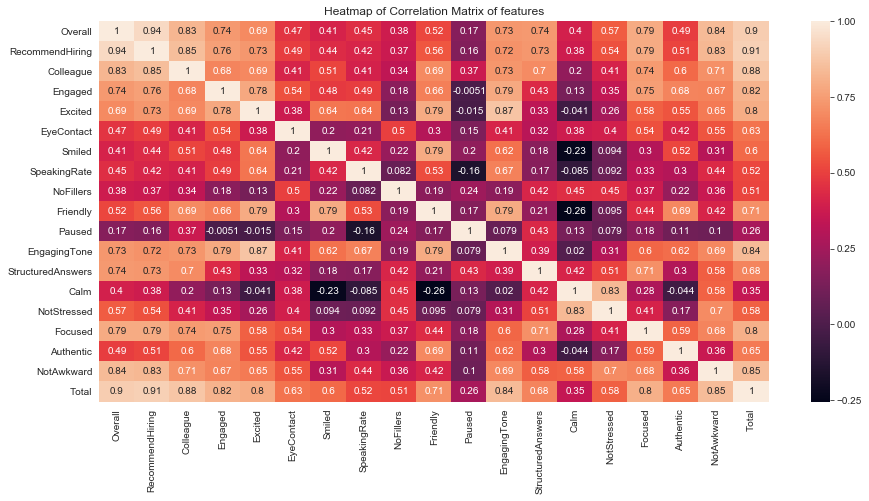

In [52]:
#correlation between between every features with each other

fig = plt.figure(figsize=(15,7))
corr = dataset.corr()
sns.heatmap(corr,annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix of features')

# Analysis On Interview Before Feedback

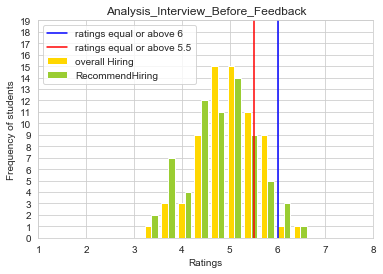

In [53]:
import numpy as np
r = dataset.loc[:,['RecommendHiring']]
z = z
#print(r)
#print(z)
plt.hist([z,r], color=['gold', 'yellowgreen'],label=['overall Hiring ','RecommendHiring'])

plt.axvline(x=6, color='blue', linestyle='-',label="ratings equal or above 6")
plt.axvline(x=5.5, color='r', linestyle='-',label="ratings equal or above 5.5")

plt.xlabel("Ratings")
plt.ylabel("Frequency of students")

plt.yticks(range(0, 20))
plt.xticks(range(1, 9))
plt.title('Analysis_Interview_Before_Feedback')
plt.legend()
plt.show()

# Spliting The Data into Training and Testing data 

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inp, out, test_size = 0.30, random_state = 0)

# KNN CLASSIFICATION

In [55]:
# Fitting K-NN to the Training set with Neighbours = 5 and p=2(Eucledean distance)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
a,b,c,d = confusion_matrix(y_test, y_pred).ravel()
print(cm)
accuracy = (a+d)/(a+b+c+d)
print("accuracy = ",accuracy*100)

[[20  0]
 [ 1  0]]
accuracy =  95.23809523809523


In [56]:
# Fitting K-NN to the Training set with Neighbours = 10 and p=2(Eucledean distance)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
a,b,c,d = confusion_matrix(y_test, y_pred).ravel()
print(cm)
accuracy = (a+d)/(a+b+c+d)
print("accuracy = ",accuracy*100)

[[20  0]
 [ 1  0]]
accuracy =  95.23809523809523


In [57]:
# Fitting K-NN to the Training set with Neighbours = 10 and p=1(manhatten distance)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 1)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
a,b,c,d = confusion_matrix(y_test, y_pred).ravel()
print(cm)
accuracy = (a+d)/(a+b+c+d)
print("accuracy = ",accuracy*100)

[[20  0]
 [ 1  0]]
accuracy =  95.23809523809523


# Logistic Regression

In [58]:
#Logistic Regression using Quasi newton Solver

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver = 'lbfgs', random_state = 1)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_p= classifier.predict(X_test)

# Making the Confusion Matrix
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_p)
a,b,c,d = confusion_matrix(y_test, y_p).ravel()
print(cm)
accuracy = (a+d)/(a+b+c+d)
print("accuracy = ",accuracy*100)

[[20  0]
 [ 1  0]]
accuracy =  95.23809523809523


In [59]:
#Logistic Regression using Stochastic Average Gradient descent solver

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver = 'saga', random_state = 10)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_p= classifier.predict(X_test)

# Making the Confusion Matrix
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_p)
a,b,c,d = confusion_matrix(y_test, y_p).ravel()
print(cm)
accuracy = (a+d)/(a+b+c+d)
print("accuracy = ",accuracy*100)

[[20  0]
 [ 1  0]]
accuracy =  95.23809523809523


# LINEAR SVM

In [60]:
# Fitting linear Kernel SVM to the Training set and C = 1 
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
a,b,c,d = confusion_matrix(y_test, y_pred).ravel()
print(cm)
accuracy = (a+d)/(a+b+c+d)
print("accuracy = ",accuracy*100)


[[20  0]
 [ 1  0]]
accuracy =  95.23809523809523


In [61]:
# Fitting linear Kernel SVM to the Training set and C = 1 
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0,C = 5)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
a,b,c,d = confusion_matrix(y_test, y_pred).ravel()
print(cm)
accuracy = (a+d)/(a+b+c+d)
print("accuracy = ",accuracy*100)


[[20  0]
 [ 1  0]]
accuracy =  95.23809523809523


# NON_LINEAR SVM

In [62]:
# Fitting Kernel SVM to the Training set with C =1

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0,C = 1)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
a,b,c,d = confusion_matrix(y_test, y_pred).ravel()
print(cm)
accuracy = (a+d)/(a+b+c+d)
print("accuracy = ",accuracy*100)

[[20  0]
 [ 1  0]]
accuracy =  95.23809523809523


In [63]:
# Fitting RBF Kernel SVM to the Training set with C = 100

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 56,C = 100)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
a,b,c,d = confusion_matrix(y_test, y_pred).ravel()
print(cm)
accuracy = (a+d)/(a+b+c+d)
print("accuracy = ",accuracy*100)

[[20  0]
 [ 1  0]]
accuracy =  95.23809523809523


# Interview After Feedback

In [64]:
#Importing the dataset

a_dataset = pd.read_csv('a.csv')
a_dataset.columns = ['Participant','Overall','RecommendHiring','Colleague','Engaged','Excited','EyeContact','Smiled','SpeakingRate','NoFillers','Friendly','Paused','EngagingTone','StructuredAnswers','Calm','NotStressed','Focused','Authentic','NotAwkward','Total']
a_dataset.head()

,Participant,Overall,RecommendHiring,Colleague,Engaged,Excited,EyeContact,Smiled,SpeakingRate,NoFillers,Friendly,Paused,EngagingTone,StructuredAnswers,Calm,NotStressed,Focused,Authentic,NotAwkward,Total
0,pp3,5.011269,5.241978,5.220098,6.063281,5.894389,5.574217,6.280271,4.731192,3.981851,6.441225,4.804796,5.483347,4.267775,5.296450,6.230518,5.524509,5.365854,5.358601,96.771623
1,pp4,5.355869,5.216769,5.187602,5.935060,5.563943,5.665674,5.405793,4.756105,3.421333,5.574743,5.143761,5.054921,4.428483,4.809169,4.569293,5.405715,5.876378,4.065341,91.435953
2,pp5,5.530993,5.839977,5.896386,6.007626,4.889610,6.792919,5.173495,4.775277,5.543356,5.652745,6.189591,4.819927,5.427195,5.932806,5.512039,6.259781,5.885038,6.040859,102.169620
3,pp6,4.139805,3.892621,3.548270,4.376918,3.388857,4.279989,2.682460,4.245647,3.555086,3.394588,4.435251,2.342349,4.398971,5.280238,5.222330,5.454540,4.905344,4.168653,73.711914
4,pp7,5.608698,5.447008,5.226138,5.736318,5.257184,6.662158,5.269019,5.214267,5.996113,5.247400,6.103040,5.284926,5.386279,5.507358,5.536554,6.135816,5.872189,5.149212,100.639679


In [65]:
x_a = a_dataset.loc[:,['RecommendHiring','Colleague','Engaged','Excited','EyeContact','Smiled','SpeakingRate','NoFillers','Friendly','Paused','EngagingTone','StructuredAnswers','Calm','NotStressed','Focused','Authentic','NotAwkward','Total']]
y_a = a_dataset.loc[:,['Overall']]
x_a.head()

,RecommendHiring,Colleague,Engaged,Excited,EyeContact,Smiled,SpeakingRate,NoFillers,Friendly,Paused,EngagingTone,StructuredAnswers,Calm,NotStressed,Focused,Authentic,NotAwkward,Total
0,5.241978,5.220098,6.063281,5.894389,5.574217,6.280271,4.731192,3.981851,6.441225,4.804796,5.483347,4.267775,5.296450,6.230518,5.524509,5.365854,5.358601,96.771623
1,5.216769,5.187602,5.935060,5.563943,5.665674,5.405793,4.756105,3.421333,5.574743,5.143761,5.054921,4.428483,4.809169,4.569293,5.405715,5.876378,4.065341,91.435953
2,5.839977,5.896386,6.007626,4.889610,6.792919,5.173495,4.775277,5.543356,5.652745,6.189591,4.819927,5.427195,5.932806,5.512039,6.259781,5.885038,6.040859,102.169620
3,3.892621,3.548270,4.376918,3.388857,4.279989,2.682460,4.245647,3.555086,3.394588,4.435251,2.342349,4.398971,5.280238,5.222330,5.454540,4.905344,4.168653,73.711914
4,5.447008,5.226138,5.736318,5.257184,6.662158,5.269019,5.214267,5.996113,5.247400,6.103040,5.284926,5.386279,5.507358,5.536554,6.135816,5.872189,5.149212,100.639679


In [66]:
#finding the students who got 6 or above ratings are hired

Hired_students_after_fd = a_dataset.loc[a_dataset['Overall'] >= 6]
#Hired_students_after_fd = Hired_students.loc[:,[ 'RecommendHiring','Colleague','Engaged','Excited','EyeContact','Smiled','SpeakingRate','NoFillers','Friendly','Paused','EngagingTone','StructuredAnswers','Calm','NotStressed','Focused','Authentic','NotAwkward','Total']]
Hired_students_after_fd.head()

,Participant,Overall,RecommendHiring,Colleague,Engaged,Excited,EyeContact,Smiled,SpeakingRate,NoFillers,Friendly,Paused,EngagingTone,StructuredAnswers,Calm,NotStressed,Focused,Authentic,NotAwkward,Total
17,pp24,6.151381,6.020304,6.043128,6.377673,5.689796,6.081192,6.422776,4.895461,5.789718,6.495741,6.210133,6.101491,5.726297,5.686740,5.523628,6.152373,6.322512,6.033028,107.723374
24,pp33,6.133183,6.199430,6.343931,6.242579,6.447927,5.897144,6.697792,4.791871,5.000001,6.794652,5.815126,6.491799,5.296007,5.138872,6.355869,6.479834,6.615526,6.121218,108.862763
40,pp57,6.559091,6.184030,5.470168,6.206034,6.273069,6.867506,6.933753,4.574733,6.196583,6.463043,6.252009,6.022134,6.428013,6.162253,6.109360,6.728405,6.180513,6.310121,111.920817
49,pp66,6.178052,5.728721,5.461543,6.591830,5.900285,6.329917,5.180933,4.457757,4.113920,5.171901,5.426891,6.033117,5.611501,5.921705,5.847119,6.514719,5.880572,6.179043,102.529527
62,pp81,6.452419,6.462258,5.901356,6.599853,5.791487,6.266908,5.828234,4.738017,5.799703,5.965788,6.185003,5.877261,6.284214,6.049346,5.969744,6.599853,5.939903,6.301353,109.012699


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

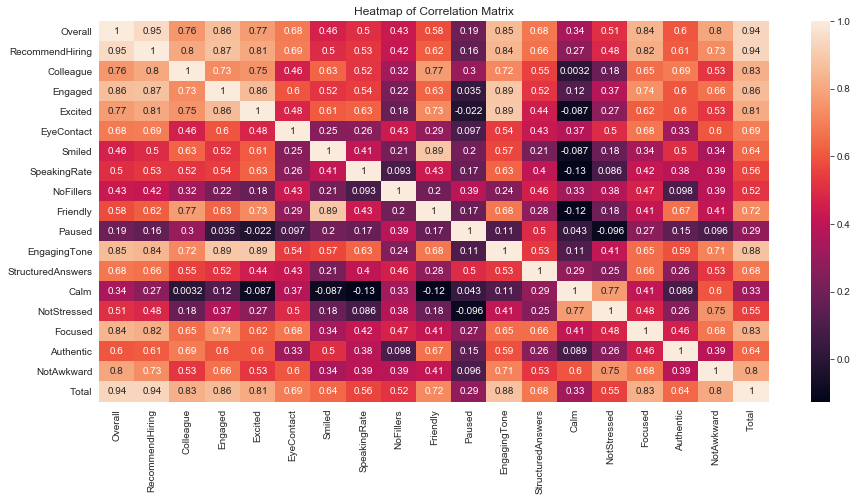

In [67]:
#correlation between between every features with each other

fig = plt.figure(figsize=(15,7))
corr = a_dataset.corr()
sns.heatmap(corr,annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')

In [68]:
y_a = a_dataset.loc[:,['Overall']]
z = y_a.values
r = a_dataset.loc[:,['RecommendHiring']]
y_a.head()

,Overall
0,5.011269
1,5.355869
2,5.530993
3,4.139805
4,5.608698


In [69]:
#Analysis of students who got hired or not with respect to ratings

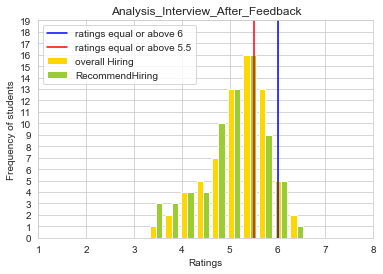

In [70]:
import numpy as np
r = a_dataset.loc[:,['RecommendHiring']]
z = z
#print(r)
#print(z)
plt.hist([z,r], color=['gold', 'yellowgreen'],label=['overall Hiring ','RecommendHiring'])

plt.axvline(x=6, color='blue', linestyle='-',label="ratings equal or above 6")
plt.axvline(x=5.5, color='r', linestyle='-',label="ratings equal or above 5.5")

plt.xlabel("Ratings")
plt.ylabel("Frequency of students")

plt.yticks(range(0, 20))
plt.xticks(range(1, 9))
plt.title('Analysis_Interview_After_Feedback')
plt.legend()
plt.show()

In [71]:
out_a = y_a.values

out_a = (out_a >= 6) * 1

#print(z)

In [72]:
#ormalisation of Data

mean_a = x_a.mean()
print(mean_a)
std_a  = x_a.std()
print(std_a)
normalized_data_a = (x_a - mean_a) / std_a
normalized_data_a.describe()

RecommendHiring       5.075243
Colleague             5.086817
Engaged               5.556307
Excited               4.955564
EyeContact            5.466458
Smiled                5.266365
SpeakingRate          4.648156
NoFillers             4.521231
Friendly              5.440601
Paused                5.625748
EngagingTone          4.905975
StructuredAnswers     4.906139
Calm                  5.406858
NotStressed           5.402690
Focused               5.733019
Authentic             5.912782
NotAwkward            5.029820
Total                94.142894
dtype: float64
RecommendHiring      0.697468
Colleague            0.616971
Engaged              0.665082
Excited              0.824813
EyeContact           0.714811
Smiled               0.986597
SpeakingRate         0.364233
NoFillers            1.018910
Friendly             0.775627
Paused               0.510040
EngagingTone         0.932224
StructuredAnswers    0.667996
Calm                 0.583875
NotStressed          0.556849
Focused

,RecommendHiring,Colleague,Engaged,Excited,EyeContact,Smiled,SpeakingRate,NoFillers,Friendly,Paused,EngagingTone,StructuredAnswers,Calm,NotStressed,Focused,Authentic,NotAwkward,Total
count,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01
mean,2.449021e-16,2.295958e-15,1.381248e-15,5.861324e-16,-3.722512e-16,-2.257692e-16,-1.235531e-15,-7.085835e-16,-9.412405e-16,5.779690e-16,1.698680e-15,4.000068e-16,-1.893910e-15,-1.443290e-15,-3.872719e-15,1.466147e-15,1.337166e-15,-2.862906e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.551637e+00,-2.493709e+00,-3.100710e+00,-2.567973e+00,-2.457661e+00,-2.619008e+00,-2.949970e+00,-2.757991e+00,-2.673320e+00,-3.233685e+00,-2.806660e+00,-2.634210e+00,-2.379574e+00,-2.230200e+00,-3.035830e+00,-2.472602e+00,-2.833866e+00,-2.634044e+00
25%,-5.448868e-01,-6.763352e-01,-5.325489e-01,-5.849646e-01,-5.296842e-01,-4.464424e-01,-5.408606e-01,-5.592983e-01,-4.946723e-01,-7.035541e-01,-4.862799e-01,-7.074176e-01,-5.460278e-01,-6.611475e-01,-5.478079e-01,-6.297035e-01,-4.888608e-01,-4.444600e-01
50%,1.817039e-01,1.272764e-01,2.780569e-01,7.057947e-02,1.527708e-01,1.027285e-01,2.017431e-01,-3.809781e-02,5.110575e-02,2.660907e-01,2.029792e-01,5.065238e-02,9.110898e-02,4.939098e-02,8.957030e-02,8.652098e-02,2.000039e-02,1.456619e-01
75%,6.926522e-01,6.336656e-01,5.808991e-01,7.439272e-01,6.148300e-01,7.793841e-01,5.420555e-01,7.214389e-01,7.582171e-01,6.845898e-01,6.265028e-01,6.627021e-01,7.521115e-01,6.009513e-01,6.114831e-01,6.889145e-01,5.348974e-01,6.434612e-01
max,1.988643e+00,2.043947e+00,1.569048e+00,1.901465e+00,1.960026e+00,1.690040e+00,2.073272e+00,1.733093e+00,1.745750e+00,1.739243e+00,1.701119e+00,2.278269e+00,2.136205e+00,1.942595e+00,1.960678e+00,1.709900e+00,1.960889e+00,2.052122e+00


In [73]:
#Taking normlised data as input

inp_a = normalized_data_a.loc[:,['RecommendHiring','Colleague','Engaged','Excited','EyeContact','Smiled','SpeakingRate','NoFillers','Friendly','Paused','EngagingTone','StructuredAnswers','Calm','NotStressed','Focused','Authentic','NotAwkward','Total']]
inp_a.head()

,RecommendHiring,Colleague,Engaged,Excited,EyeContact,Smiled,SpeakingRate,NoFillers,Friendly,Paused,EngagingTone,StructuredAnswers,Calm,NotStressed,Focused,Authentic,NotAwkward,Total
0,0.239058,0.216025,0.762273,1.138227,0.150752,1.027681,0.227974,-0.529370,1.290084,-1.609582,0.619350,-0.955641,-0.189095,1.486631,-0.410717,-1.330770,0.421685,0.303437
1,0.202913,0.163355,0.569483,0.737596,0.278698,0.141323,0.296374,-1.079486,0.172947,-0.944998,0.159776,-0.715059,-1.023659,-1.496631,-0.644713,-0.088576,-1.237014,-0.312465
2,1.096444,1.312167,0.678592,-0.079963,1.855683,-0.094131,0.349009,1.003155,0.273513,1.105489,-0.092304,0.780028,0.900788,0.196370,1.037597,-0.067505,1.296732,0.926532
3,-1.695595,-2.493709,-1.773297,-1.899469,-1.659838,-2.619008,-1.105085,-0.948215,-2.637881,-2.334124,-2.750010,-0.759239,-0.216862,-0.323895,-0.548539,-2.451271,-1.104510,-2.358366
4,0.533021,0.225814,0.270660,0.365683,1.672751,0.002691,1.554253,1.447509,-0.249090,0.935794,0.406503,0.718777,0.172126,0.240396,0.793415,-0.098768,0.153129,0.749930


# Spliting tha Dataset into Test Data and Train data

In [74]:


from sklearn.model_selection import train_test_split
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(inp_a, out_a, test_size = 0.30, random_state = 13)


# KNN classification

In [75]:
# Fitting K-NN to the Training set with Neighbours = 5 with euclidean distance

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train_a, y_train_a)

# Predicting the Test set results
y_pred_a = classifier.predict(X_test_a)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_a, y_pred_a)
a,b,c,d = confusion_matrix(y_test_a, y_pred_a).ravel()
print(cm)
accuracy = (a+d)/(a+b+c+d)
print("accuracy = ",accuracy*100)


[[19  0]
 [ 1  1]]
accuracy =  95.23809523809523


In [76]:
# Fitting K-NN to the Training set with Neighbours = 10 with euclidean distance 

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
classifier.fit(X_train_a, y_train_a)

# Predicting the Test set results
y_pred_a = classifier.predict(X_test_a)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_a, y_pred_a)
a,b,c,d = confusion_matrix(y_test_a, y_pred_a).ravel()
print(cm)
accuracy = (a+d)/(a+b+c+d)
print("accuracy = ",accuracy*100)

[[19  0]
 [ 2  0]]
accuracy =  90.47619047619048


In [77]:
# Fitting K-NN to the Training set with Neighbours = 10 and p=1(manhatten distance)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 1)
classifier.fit(X_train_a, y_train_a)

# Predicting the Test set results
y_pred_a = classifier.predict(X_test_a)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_a, y_pred_a)
a,b,c,d = confusion_matrix(y_test_a, y_pred_a).ravel()
print(cm)
accuracy = (a+d)/(a+b+c+d)
print("accuracy = ",accuracy*100)

[[19  0]
 [ 2  0]]
accuracy =  90.47619047619048


# Logistic Regression

In [78]:
#Logistic Regression using Quasi newton Solver

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver = 'lbfgs', random_state = 1)
classifier.fit(X_train_a, y_train_a)

# Predicting the Test set results
y_p_a= classifier.predict(X_test_a)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_a, y_p_a)

a,b,c,d = confusion_matrix(y_test_a, y_p_a).ravel()
print(cm)
accuracy = (a+d)/(a+b+c+d)
print("accuracy = ",accuracy*100)

[[19  0]
 [ 0  2]]
accuracy =  100.0


In [79]:
#Logistic Regression using Stochastic Average Gradient descent solver

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver = 'saga', random_state = 10)
classifier.fit(X_train_a, y_train_a)

# Predicting the Test set results
y_p_a= classifier.predict(X_test_a)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_a, y_p_a)
a,b,c,d = confusion_matrix(y_test_a, y_p_a).ravel()
print(cm)

accuracy = (a+d)/(a+b+c+d)
print("accuracy = ",accuracy*100)

[[19  0]
 [ 0  2]]
accuracy =  100.0


# SVM

In [80]:
# Fitting Linear SVM to the Training set with C = 5 and random state = 2
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 2,C = 1)
classifier.fit(X_train_a, y_train_a)

# Predicting the Test set results
y_pred_a = classifier.predict(X_test_a)
a,b,c,d = confusion_matrix(y_test_a, y_pred_a).ravel()
print(cm)

accuracy = (a+d)/(a+b+c+d)
print("accuracy = ",accuracy*100)


[[19  0]
 [ 0  2]]
accuracy =  95.23809523809523


In [81]:
# Fitting Linear SVM to the Training set with C = 5

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0,C = 5)
classifier.fit(X_train_a, y_train_a)

# Predicting the Test set results
y_pred_a = classifier.predict(X_test_a)
a,b,c,d = confusion_matrix(y_test_a, y_pred_a).ravel()
print(cm)

accuracy = (a+d)/(a+b+c+d)
print("accuracy = ",accuracy*100)


[[19  0]
 [ 0  2]]
accuracy =  95.23809523809523


In [82]:
# Fitting  RBF Kernel SVM to the Training set with C = 1

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0,C=1)
classifier.fit(X_train_a, y_train_a)

# Predicting the Test set results
y_pred_a = classifier.predict(X_test_a)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_a, y_pred_a)
a,b,c,d = confusion_matrix(y_test_a, y_pred_a).ravel()
print(cm)
accuracy = (a+d)/(a+b+c+d)
print("accuracy = ",accuracy*100)

[[19  0]
 [ 2  0]]
accuracy =  90.47619047619048


In [83]:
# Fitting  RBF Kernel SVM to the Training set with C = 5

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0, C=5)
classifier.fit(X_train_a, y_train_a)

# Predicting the Test set results
y_pred_a = classifier.predict(X_test_a)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_a, y_pred_a)
a,b,c,d = confusion_matrix(y_test_a, y_pred_a).ravel()
print(cm)
accuracy = (a+d)/(a+b+c+d)
print("accuracy = ",accuracy*100)

[[19  0]
 [ 0  2]]
accuracy =  100.0


# Analysis between features of hired students before and after Feedback in Interview

In [84]:
cura = a_dataset.corr().values
cura = cura[2:18,0]*10
print(cura)

curb = dataset.corr().values
curb = curb[2:18,0]*10
print(curb)
z = ('Colleague','Engaged','Excited','EyeContact','Smiled','SpeakingRate','NoFillers','Friendly','Paused','EngagingTone','StructuredAnswers','Calm','NotStressed','Focused','Authentic','NotAwkward')


[7.56116743 8.64540509 7.72826962 6.84155266 4.64632147 5.03630976
 4.28808168 5.78526142 1.87465176 8.54934502 6.81373462 3.42448558
 5.08372077 8.39384862 6.01258694 7.98926437]
[8.26544325 7.35873254 6.93272652 4.67551057 4.07878817 4.50031696
 3.78511081 5.15331582 1.67679128 7.3440259  7.36927605 4.00031472
 5.68836153 7.93209048 4.93950536 8.3858063 ]


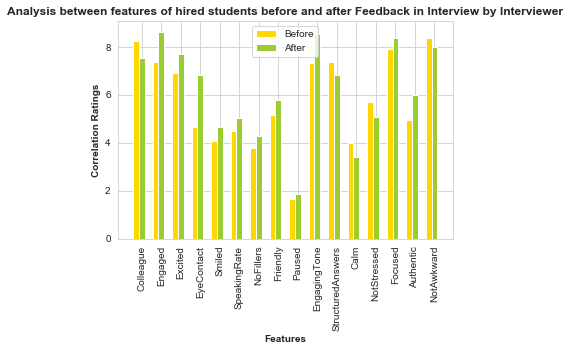

In [85]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.30
 

# Set position of bar on X axis
r1 = np.arange(len(curb))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, curb, color='gold', width=barWidth, edgecolor='white', label='Before')
plt.bar(r2, cura, color='yellowgreen', width=barWidth, edgecolor='white', label='After')

# Add xticks on the middle of the group bars
plt.xlabel('Features', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(cura))], z, rotation=90)
 
plt.ylabel('Correlation Ratings', fontweight='bold')

# Create legend & Show graphic
plt.legend()
plt.title("Analysis between features of hired students before and after Feedback in Interview by Interviewer",fontweight='bold')
plt.show()
